__Hello World Project__

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import New York Crime data between 2015-2017

In [22]:
data_NY = pd.read_csv('NY_2015-2017.csv', low_memory=False)
print(data_NY.columns)

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD', 'PD_DESC',
       'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'JURIS_DESC', 'BORO_NM',
       'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'PARKS_NM',
       'HADEVELOPT', 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude',
       'Lat_Lon'],
      dtype='object')


In [147]:
df_NY=pd.DataFrame(data_NY, columns=['CMPLNT_FR_DT', 'PD_DESC', 'LAW_CAT_CD', 'BORO_NM', 'PREM_TYP_DESC'])
df_NY['CMPLNT_FR_DT']=pd.to_datetime(df_NY['CMPLNT_FR_DT'])

The distribution of crimes

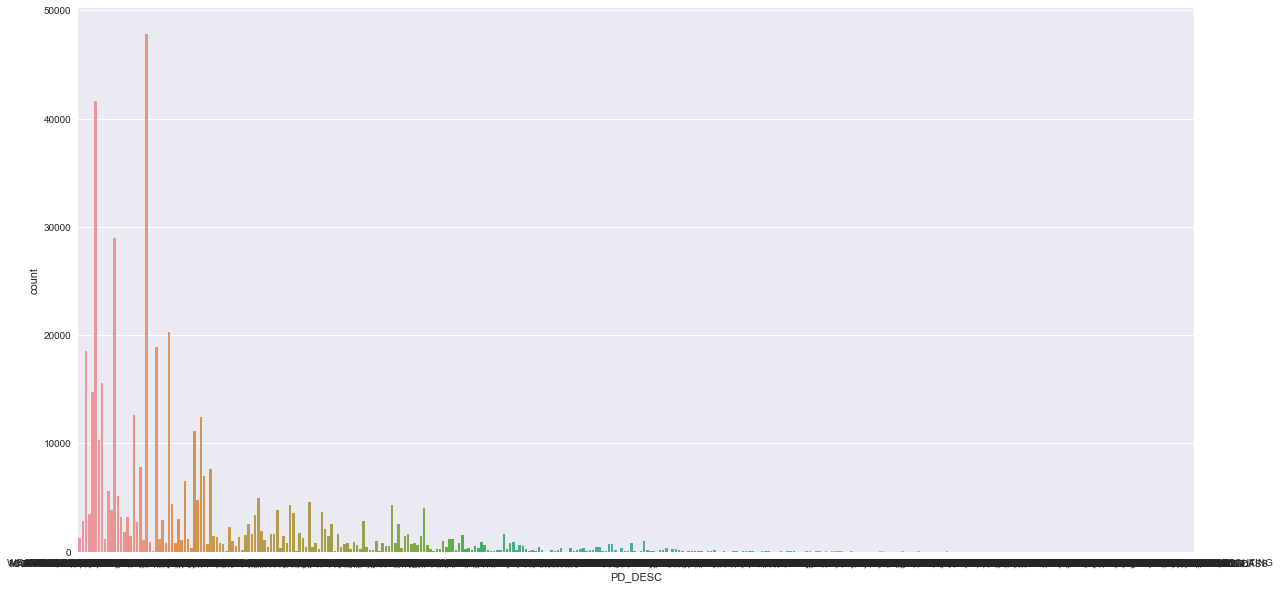

In [96]:
fig = plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="PD_DESC", data=df_NY)

__Organize the data__

1- By year

       count unique                        top   freq
YEAR                                                 
2015     821     94  FRAUD,UNCLASSIFIED-FELONY    129
2016    8365    187      HARASSMENT,SUBD 3,4,5    701
2017  457768    345      HARASSMENT,SUBD 3,4,5  47042


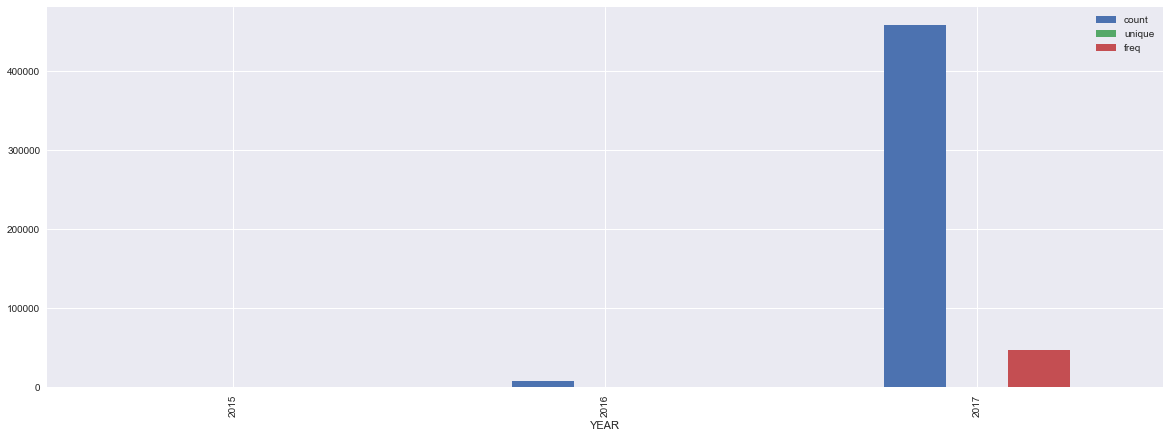

In [145]:
#By Year
df_NY['YEAR']=df_NY['CMPLNT_FR_DT'].dt.year
crime_yr=df_NY.groupby(['YEAR'])['PD_DESC'].describe()
print(crime_yr)
crime_yr.plot.bar(figsize=(20,7))

2- By Month

In [24]:
df_NY['MONTH']=df_NY['CMPLNT_FR_DT'].dt.month
crime_month=df_NY.groupby(['MONTH'])['PD_DESC'].size()
print(crime_month)

MONTH
1     38559
2     33084
3     36363
4     37740
5     40652
6     40380
7     41907
8     41773
9     40305
10    41849
11    37613
12    37009
Name: PD_DESC, dtype: int64


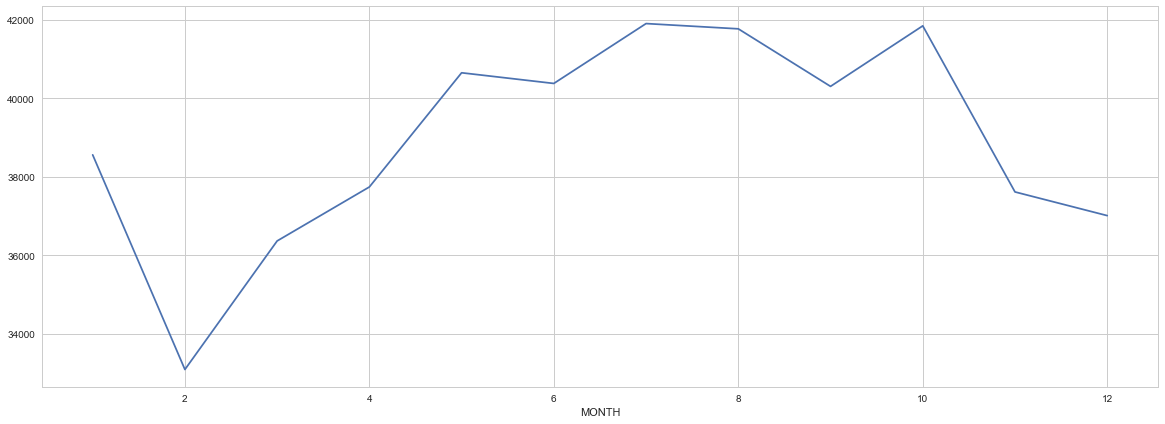

In [29]:
#the plot of the crime by month
fig, ax = plt.subplots(figsize=(20,7)) #change the size of the plot
crime_month.plot(ax=ax)

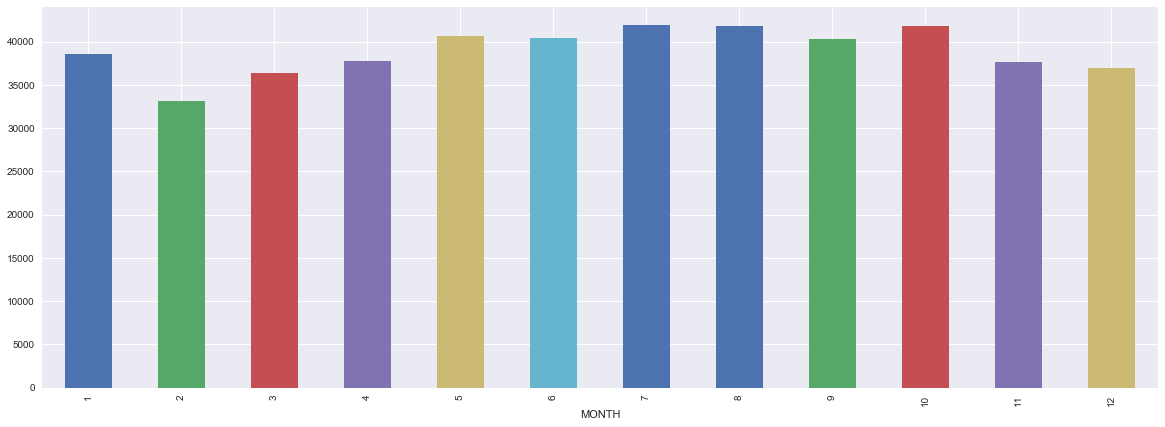

In [104]:
# Another way to show the plot
fig, ax = plt.subplots(figsize=(20,7))
crime_month.plot.bar()

3- By Borough

In [37]:
#By Borough
crime_borough=df_NY.groupby(['BORO_NM','PD_DESC']).size()
print(crime_borough)

BORO_NM        PD_DESC                              
BRONX          ABANDON ANIMAL                              20
               ACCOSTING,FRAUDULENT                        23
               ADM.CODE,UNCLASSIFIED MISDEMEA             173
               ADM.CODE,UNCLASSIFIED VIOLATIO               3
               AGGRAVATED CRIMINAL CONTEMPT                27
               AGGRAVATED HARASSMENT 1                     48
               AGGRAVATED HARASSMENT 2                   4846
               AGGRAVATED SEXUAL ASBUSE                     6
               AGRICULTURE & MARKETS LAW,UNCL              20
               ALCOHOLIC BEVERAGE CONTROL LAW              71
               APPEARANCE TICKET FAIL TO RESP               1
               ARSON 1                                      1
               ARSON 2,3,4                                152
               ARSON, MOTOR VEHICLE 1 2 3 & 4              55
               ASSAULT 2,1,UNCLASSIFIED                  4502
               AS

In [13]:
#Organize
crime_borough=df_NY.groupby(['BORO_NM','PD_DESC']).size().nlargest(10)
print(crime_borough)

BORO_NM    PD_DESC                       
BROOKLYN   HARASSMENT,SUBD 3,4,5             14789
MANHATTAN  LARCENY,PETIT FROM STORE-SHOPL    12381
BROOKLYN   ASSAULT 3                         11905
BRONX      HARASSMENT,SUBD 3,4,5             10805
           ASSAULT 3                         10505
QUEENS     HARASSMENT,SUBD 3,4,5             10123
MANHATTAN  ASSAULT 3                          8903
           HARASSMENT,SUBD 3,4,5              8688
QUEENS     ASSAULT 3                          8653
BROOKLYN   LARCENY,PETIT FROM STORE-SHOPL     6826
dtype: int64


Frequency Distribution:
BROOKLYN         137283
MANHATTAN        114104
BRONX            103218
QUEENS            91367
STATEN ISLAND     21262
Name: BORO_NM, dtype: int64


[Text(0,0,'BROOKLYN'),
 Text(0,0,'MANHATTAN'),
 Text(0,0,'BRONX'),
 Text(0,0,'QUEENS'),
 Text(0,0,'STATEN ISLAND')]

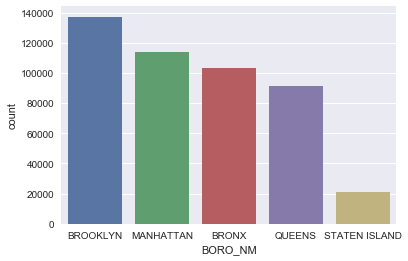

In [82]:
#NY City borough with most crimes (from 2015-2017)
NY_borough = df_NY['BORO_NM'].value_counts()
print('Frequency Distribution:', NY_borough[:10], sep='\n')
%matplotlib inline
g_NY_district=seaborn.countplot(x='BORO_NM', data=df_NY,order=df_NY['BORO_NM'].value_counts().iloc[:10].index)
g_NY_district.set_xticklabels(g_NY_district.get_xticklabels())

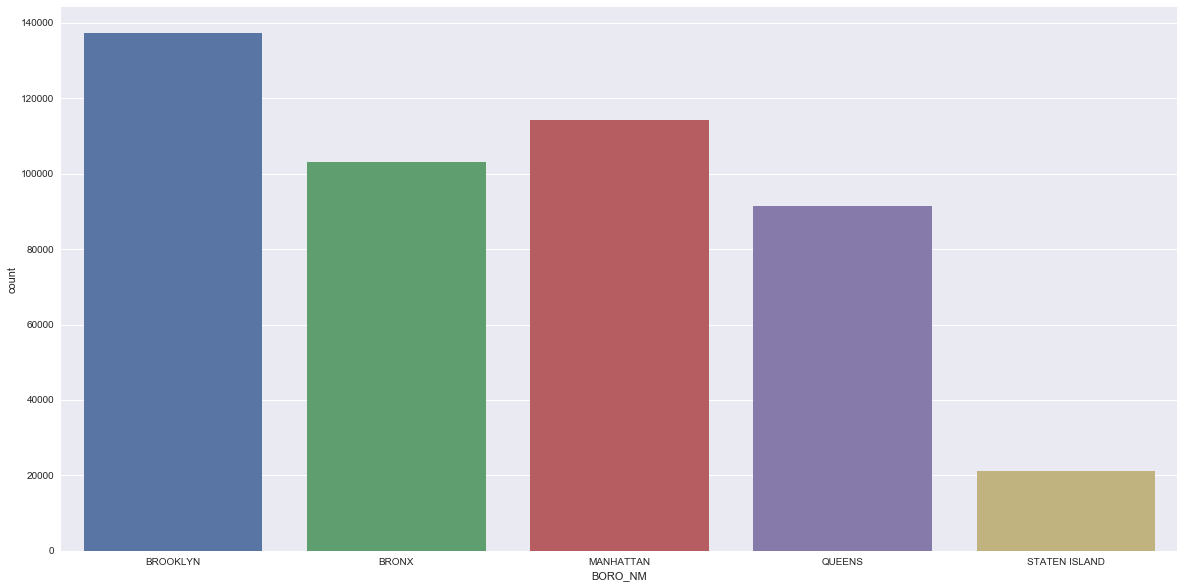

In [85]:
#Another way to show the plot
fig = plt.figure(figsize=(20,10))
fig.add_subplot(1,1,1)
sns.set(style="darkgrid") #choose a style u like
ax = sns.countplot(x="BORO_NM",  data=df_NY)

4- By Primary Type

In [40]:
#New York Crime Distribution
primary_type=df_NY['PD_DESC'].value_counts()
print('Frequency Distribution:', primary_type[:10], sep='\n')

Frequency Distribution:
HARASSMENT,SUBD 3,4,5               47801
ASSAULT 3                           41636
LARCENY,PETIT FROM STORE-SHOPL      29010
AGGRAVATED HARASSMENT 2             20277
LARCENY,PETIT FROM BUILDING,UN      18934
HARASSMENT,SUBD 1,CIVILIAN          18544
ASSAULT 2,1,UNCLASSIFIED            15624
MISCHIEF, CRIMINAL 4, OF MOTOR      14745
CRIMINAL MISCHIEF,UNCLASSIFIED 4    12666
LARCENY,PETIT FROM AUTO             12470
Name: PD_DESC, dtype: int64


[Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,''),
 Text(0,0,'')]

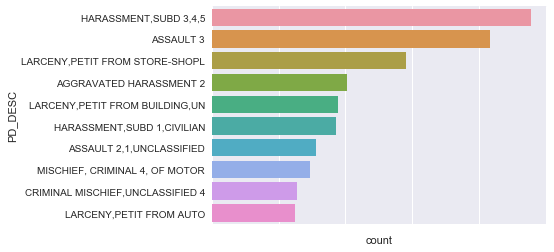

In [113]:
%matplotlib inline
g_NY=seaborn.countplot(y='PD_DESC', data=df_NY,order=df_NY['PD_DESC'].value_counts().iloc[:10].index)
g_NY.set_xticklabels(g_NY.get_xticklabels(),rotation=90)

5- By law

In [154]:
#Crime count by Boroughs under each Law Category

crime_by_law_cat=df_NY.groupby(['LAW_CAT_CD', 'BORO_NM']).size()
print(crime_by_law_cat)

LAW_CAT_CD   BORO_NM      
FELONY       BRONX            28616
             BROOKLYN         43968
             MANHATTAN        35178
             QUEENS           29247
             STATEN ISLAND     4747
MISDEMEANOR  BRONX            59251
             BROOKLYN         73563
             MANHATTAN        65697
             QUEENS           47874
             STATEN ISLAND    11896
VIOLATION    BRONX            15351
             BROOKLYN         19752
             MANHATTAN        13229
             QUEENS           14246
             STATEN ISLAND     4619
dtype: int64


In [152]:
#law categories overall count

crime_by_law_cat_largest=df_NY.groupby(['LAW_CAT_CD']).size().nlargest(3)
print(crime_by_immediate_location_largest)

LAW_CAT_CD
MISDEMEANOR    258281
FELONY         141756
VIOLATION       67197
dtype: int64


[Text(0,0,'MISDEMEANOR'), Text(0,0,'FELONY'), Text(0,0,'VIOLATION')]

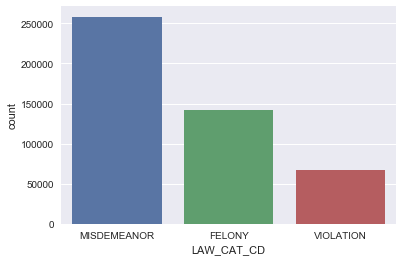

In [151]:
#Visual Representation of the Severity of crimes committed on total
%matplotlib inline
g_NY_district=seaborn.countplot(x='LAW_CAT_CD', data=df_NY,order=df_NY['LAW_CAT_CD'].value_counts().iloc[:3].index)
g_NY_district.set_xticklabels(g_NY_district.get_xticklabels())